In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
SIZE_TRAIN=40
SIZE_VAL=30
SIZE_TEST=30


In [2]:
def shuffle_dataset(x,y):
    """
    Shuffles two arrays in the same order.
    """
    randomize = np.arange(len(x))
    randomize=np.random.shuffle(randomize)
    return np.squeeze(x[randomize]),np.squeeze(y[randomize])
def read_data(file_name):
    df=pd.read_csv("data.txt",sep="  ",names=["X","y"],engine="python")
    X=df.X.values
    y=df.y.values
    return X[0:SIZE_TRAIN],y[0:SIZE_TRAIN],X[SIZE_TRAIN:SIZE_VAL+SIZE_TRAIN],y[SIZE_TRAIN:SIZE_VAL+SIZE_TRAIN],X[-SIZE_TEST:],y[-SIZE_TEST:]
def sigmoid_function( X ):
    return np.exp(-np.logaddexp(0, -X))
def calculate_Z(x,number_of_z,weights_W):            
    """
    Calculates values for hidden layers 
    Bias term should be added two instance before calling this function
    """   
    z=np.zeros(number_of_z,dtype=np.float64)

    for h in range(number_of_z):
        sum_of_wx=0
        for j in range(len(x)):
            sum_of_wx+=(weights_W[h][j]*x[j])
        z[h]=sigmoid_function(sum_of_wx)
    return z
def calculate_Y(z,weights_T):
    """
    Calculates values for output layers 
    Bias term should be added two instance before calling this function
    """
    sum_of_ih=0
    for h in range(len(z)):
         sum_of_ih+=weights_T[h]*z[h]
    return sum_of_ih

In [3]:

def predict_one_instance(x,number_of_hidden_nodes,w_t,w_w):  
    x=np.array([1,x])# +1 bias
    z=calculate_Z(x,number_of_hidden_nodes,w_w)
    z=np.insert(z,0,1)# +1 bias
    return calculate_Y(z,w_t)

def predict(testX,number_of_hidden_nodes,w_t,w_w):
    """
    Predicts given dataset inputs.
    """
    return [predict_one_instance(x,number_of_hidden_nodes,w_t,w_w) for x in testX]
def loss_func(predictions,targets):
    """
    Computes binary cross entropy
    """
    #predictions = np.clip(predictions, epsilon, 1. - epsilon)
    total=0
    for y,r in zip(predictions,targets):
        total+=np.square(r-y)
    return total/2


In [4]:
X_train,y_train,X_val,y_val,X_test,y_test=read_data("data.txt")
epochs=250

number_of_hidden_nodes=50
metrics=[]
weights_W_all_h_nodes=[]
weights_T_all_h_nodes=[]
z_s=[]
def fit(trainX,trainY,valX,valY,h_nodes,epochs):
    learning_rate=0.001
    momentum_rate=0.01
    np.random.seed(1000)
    weights_W=np.random.uniform(-0.001,0.001,(h_nodes,2)) #initialize W ,2(input+bias)-#hidden_layers
    weights_T=np.random.uniform(-0.001,0.001,h_nodes+1)#initialize T 
    for m in range(epochs):     
        shuffled_X,shuffled_Y=shuffle_dataset(trainX,trainY)
        grad_Th=np.zeros(h_nodes+1,dtype=np.float64)
        grad_Whj=np.zeros((h_nodes,2),dtype=np.float64)
        for x,r in zip(shuffled_X,shuffled_Y):
            
            """storing previous gradients for momentum"""
            prev_grad_Th=np.copy(grad_Th)
            prev_grad_Whj=np.copy(grad_Whj)

            x=np.array([1,x])# +1 bias
            z=calculate_Z(x,h_nodes,weights_W)
            z=np.insert(z,0,1)# +1 bias
            y=calculate_Y(z,weights_T)
            
            """Backpropagation"""
            #1-Calculate gradients
            for h in range(len(grad_Th)):
                grad_Th[h]=learning_rate*(r-y)*z[h]

            for h in range(h_nodes):
                for j in range(len(x)):
                    grad_Whj[h][j]=learning_rate*(r-y)*weights_T[h]*z[h]*(1-z[h])*x[j]

            #2-Update weights
            for h in range(len(grad_Th)):
                weights_T[h]+=(grad_Th[h]+(momentum_rate*prev_grad_Th[h]))
            for h in range(h_nodes):
                for j in range(len(x)):
                    weights_W[h][j]+=(grad_Whj[h][j]+(momentum_rate*prev_grad_Whj[h][j]))

        train_loss=loss_func(predict(shuffled_X,h_nodes,weights_T,weights_W),shuffled_Y)
        val_loss=loss_func(predict(valX,h_nodes,weights_T,weights_W),valY)
        learning_rate+=0.001
    return train_loss,val_loss,weights_W,weights_T,z
for h_nodes in range(1,number_of_hidden_nodes):
    train_loss,val_loss,weights_W,weights_T,z=fit(X_train,y_train,X_val,y_val,h_nodes,epochs)
    print("Number of hidden nodes(without bias) "+str(h_nodes)+" Training Error: %.4f"%train_loss +" Validation Error: %.4f"%val_loss)
    metrics.append([train_loss,val_loss])
    z_s.append(z)
    weights_W_all_h_nodes.append(weights_W)
    weights_T_all_h_nodes.append(weights_T)
metrics=np.asarray(metrics)

Number of hidden nodes(without bias) 1 Training Error: 10.4292 Validation Error: 5.8629
Number of hidden nodes(without bias) 2 Training Error: 10.3492 Validation Error: 5.9395
Number of hidden nodes(without bias) 3 Training Error: 10.1978 Validation Error: 11.1586
Number of hidden nodes(without bias) 4 Training Error: 4.7195 Validation Error: 6.0576
Number of hidden nodes(without bias) 5 Training Error: 3.4046 Validation Error: 1.6226
Number of hidden nodes(without bias) 6 Training Error: 2.6302 Validation Error: 1.5363
Number of hidden nodes(without bias) 7 Training Error: 3.3387 Validation Error: 1.8868
Number of hidden nodes(without bias) 8 Training Error: 4.7421 Validation Error: 4.0462
Number of hidden nodes(without bias) 9 Training Error: 2.1209 Validation Error: 1.8855
Number of hidden nodes(without bias) 10 Training Error: 2.2276 Validation Error: 1.1680
Number of hidden nodes(without bias) 11 Training Error: 2.0825 Validation Error: 1.4954
Number of hidden nodes(without bias) 

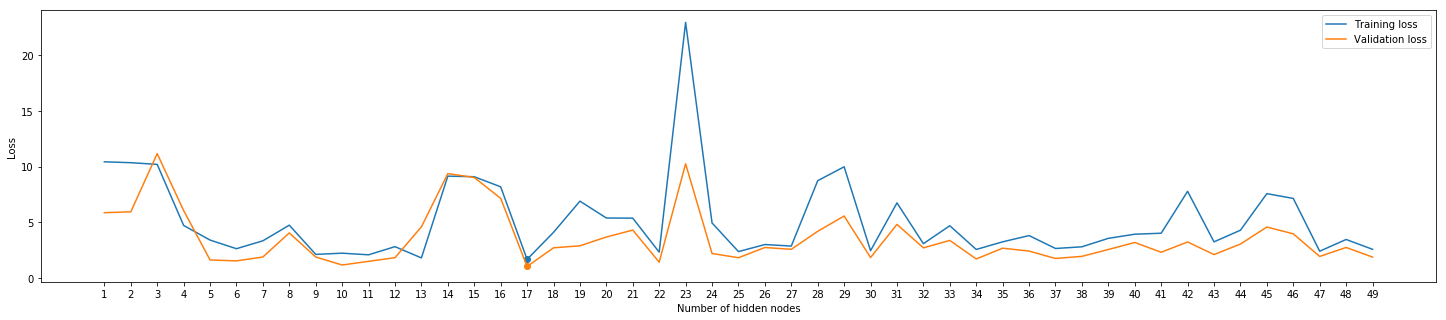

In [5]:
fig=plt.figure(figsize=(25,5))
plt.xlabel("Number of hidden nodes")
plt.ylabel("Loss")
plt.plot(range(1,number_of_hidden_nodes),metrics[:,0],label="Training loss")
plt.plot(range(1,number_of_hidden_nodes),metrics[:,1],label="Validation loss")
plt.xticks(np.arange(1, number_of_hidden_nodes, 1.0))

min_training_error_idx=np.argmin(metrics[:,0])
min_val_error_idx=np.argmin(metrics[:,1])

plt.scatter(min_training_error_idx+1,metrics[min_training_error_idx,0])
plt.scatter(min_val_error_idx+1,metrics[min_val_error_idx,1])

plt.legend()

plt.show()

# Choosing number of hidden nodes
Each training was done in 100 epochs
<br>
As we can see from the plot and results, 5 number of hidden nodes (6 with bias) seems a good fit.
<br>Number of hidden nodes(without bias) 6 Training Error: 2.6302 Validation Error: 1.5363<br>
#### Good fit = 6 Hidden Nodes
Error has been reducing till that point, so 6 hidden nodes seems a good fit.
#### Underfit = 2 Hidden Node
2 hidden node shows a good example of underfitting.
#### Overfit = 40 Hidden Nodes
40 hidden nodes shows a good example of overfitting. As we can see from the plot, training loss have been reducing but, validation loss have been started increasing.

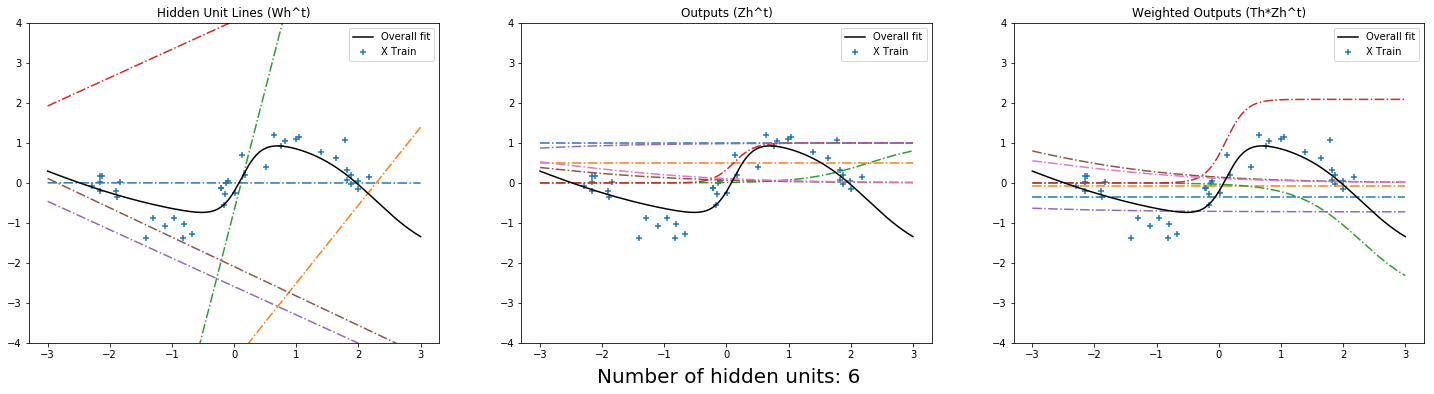

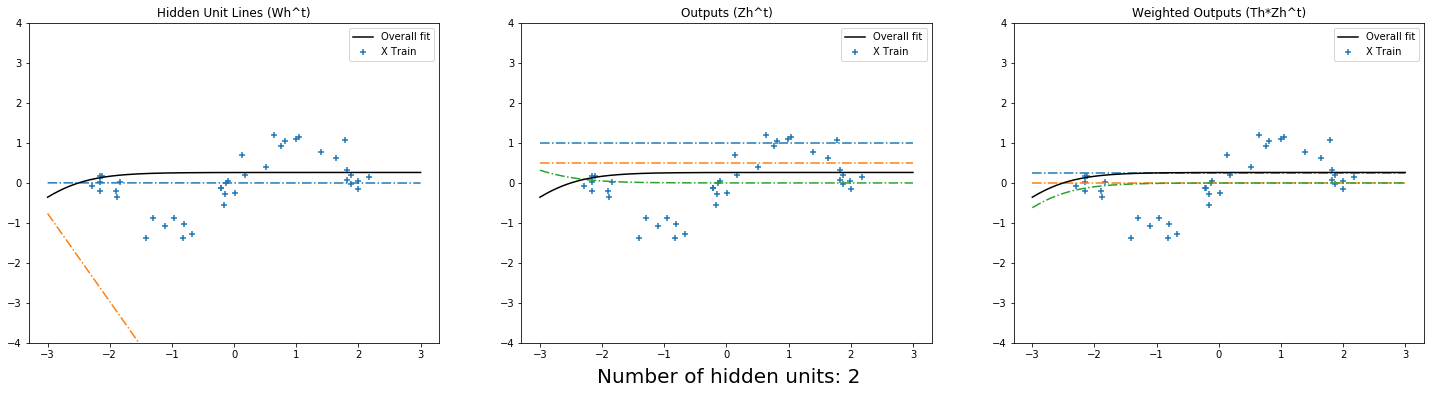

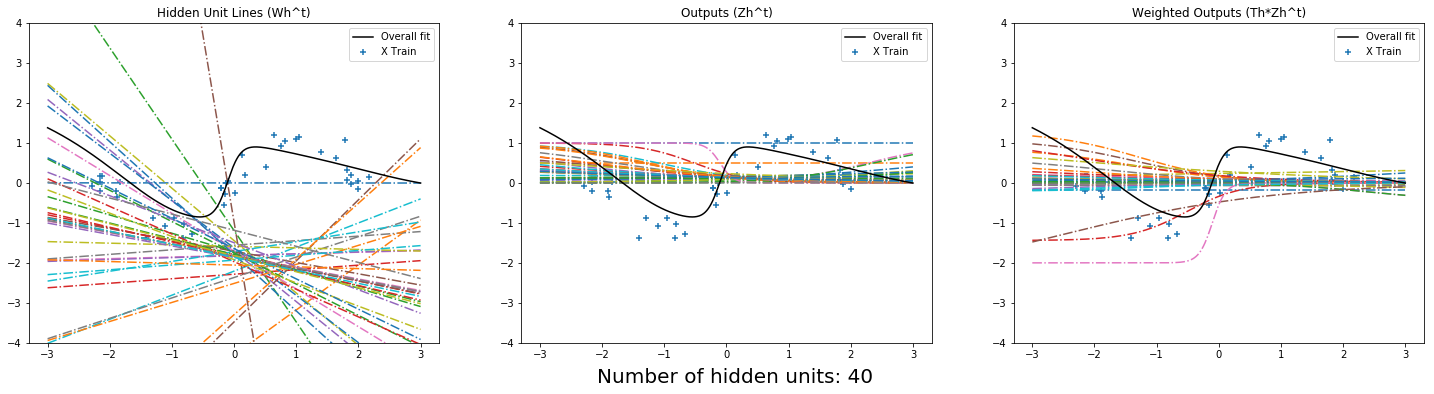

In [6]:
def plot_props_of_hidden_layer(h_node,w_T,w_w):
    linspace=np.linspace(-3,3,num=500)

    fig=plt.figure(figsize=(25,20))

    ax=fig.add_subplot(331)
    ax.scatter(X_train,y_train,label="X Train",marker="+")

    y_ax=np.dot(w_w,np.array([np.ones(len(linspace)),linspace]))
    for line in y_ax:
        plt.plot(linspace,line,'-.')
    plt.plot(linspace,predict(linspace,h_node,w_T,w_w),c="black",label="Overall fit")
    ax.set_ybound(lower=-4,upper=4)
    ax.set_title("Hidden Unit Lines (Wh^t)")

    plt.legend()

    ax=fig.add_subplot(332)
    ax.scatter(X_train,y_train,label="X Train",marker="+")
    z=[]
    for x in linspace:
        x=np.array([1,x])# +1 bias
        z_i=calculate_Z(x,h_node,w_w)
        z.append(np.insert(z_i,0,1))# +1 bias

    for line in np.array(z).T:
        plt.plot(linspace,line,'-.')
    plt.plot(linspace,predict(linspace,h_node,w_T,w_w),c="black",label="Overall fit")
    ax.set_ybound(lower=-4,upper=4)
    ax.set_title("Outputs (Zh^t)")

    plt.legend()

    ax=fig.add_subplot(333)
    ax.scatter(X_train,y_train,label="X Train",marker="+")
    for line in np.array(w_T*z).T:
        plt.plot(linspace,line,'-.')
    plt.plot(linspace,predict(linspace,h_node,w_T,w_w),c="black",label="Overall fit")
    ax.set_ybound(lower=-4,upper=4)
    ax.set_title("Weighted Outputs (Th*Zh^t)")
    plt.legend()

    plt.text(-10,-5,"Number of hidden units: "+str(h_node),fontsize=20)
    plt.show()
h_node=6
plot_props_of_hidden_layer(h_node,weights_T_all_h_nodes[h_node-1],weights_W_all_h_nodes[h_node-1])
h_node=2
plot_props_of_hidden_layer(h_node,weights_T_all_h_nodes[h_node-1],weights_W_all_h_nodes[h_node-1])
h_node=40
plot_props_of_hidden_layer(h_node,weights_T_all_h_nodes[h_node-1],weights_W_all_h_nodes[h_node-1])


Beginning...


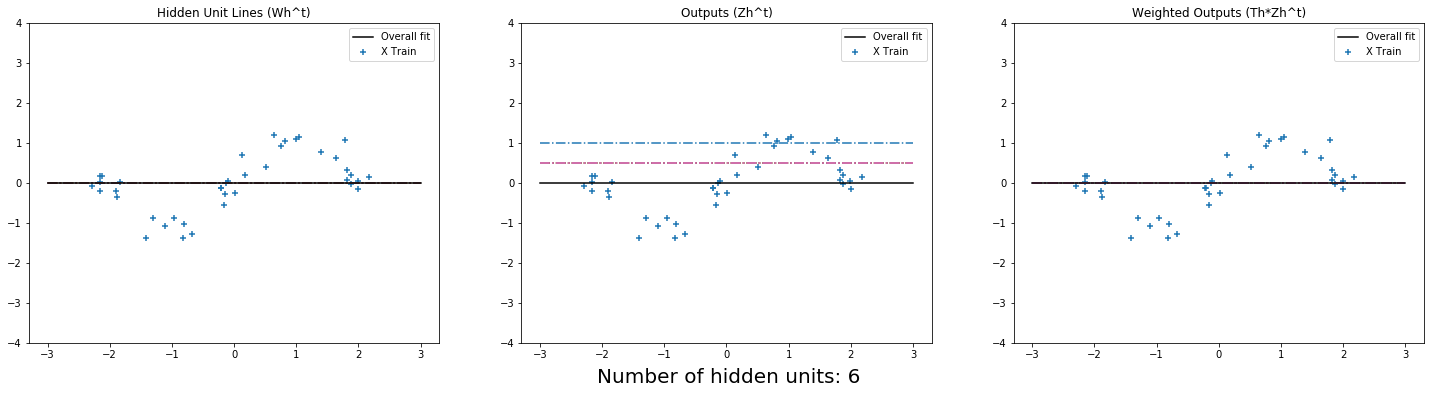

Epoch: 1 Training Error: 9.3913 Validation Error: 5.1536
Epoch: 2 Training Error: 9.3906 Validation Error: 5.1523
Epoch: 3 Training Error: 9.3902 Validation Error: 5.1508
Epoch: 4 Training Error: 9.3904 Validation Error: 5.1496
Epoch: 5 Training Error: 9.3918 Validation Error: 5.1491
Epoch: 6 Training Error: 9.3943 Validation Error: 5.1494
Epoch: 7 Training Error: 9.3978 Validation Error: 5.1505
Epoch: 8 Training Error: 9.4020 Validation Error: 5.1523
Epoch: 9 Training Error: 9.4069 Validation Error: 5.1546
Epoch: 10 Training Error: 9.4124 Validation Error: 5.1575
Epoch: 11 Training Error: 9.4186 Validation Error: 5.1608
Epoch: 12 Training Error: 9.4253 Validation Error: 5.1646
Epoch: 13 Training Error: 9.4327 Validation Error: 5.1689
Epoch: 14 Training Error: 9.4407 Validation Error: 5.1738
Epoch: 15 Training Error: 9.4494 Validation Error: 5.1791
Epoch: 16 Training Error: 9.4587 Validation Error: 5.1849
Epoch: 17 Training Error: 9.4686 Validation Error: 5.1913
Epoch: 18 Training Erro

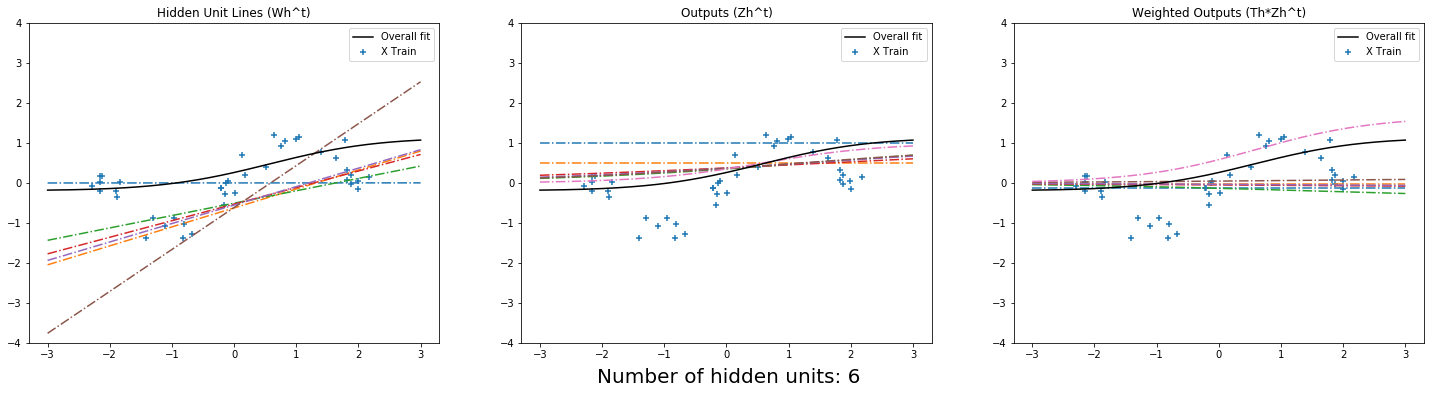

Epoch: 125 Training Error: 8.5827 Validation Error: 8.5059
Epoch: 126 Training Error: 8.5942 Validation Error: 8.5237
Epoch: 127 Training Error: 8.6058 Validation Error: 8.5416
Epoch: 128 Training Error: 8.6176 Validation Error: 8.5593
Epoch: 129 Training Error: 8.6295 Validation Error: 8.5770
Epoch: 130 Training Error: 8.6414 Validation Error: 8.5945
Epoch: 131 Training Error: 8.6534 Validation Error: 8.6118
Epoch: 132 Training Error: 8.6654 Validation Error: 8.6287
Epoch: 133 Training Error: 8.6774 Validation Error: 8.6453
Epoch: 134 Training Error: 8.6893 Validation Error: 8.6615
Epoch: 135 Training Error: 8.7010 Validation Error: 8.6771
Epoch: 136 Training Error: 8.7125 Validation Error: 8.6921
Epoch: 137 Training Error: 8.7238 Validation Error: 8.7063
Epoch: 138 Training Error: 8.7348 Validation Error: 8.7198
Epoch: 139 Training Error: 8.7454 Validation Error: 8.7324
Epoch: 140 Training Error: 8.7556 Validation Error: 8.7440
Epoch: 141 Training Error: 8.7653 Validation Error: 8.75

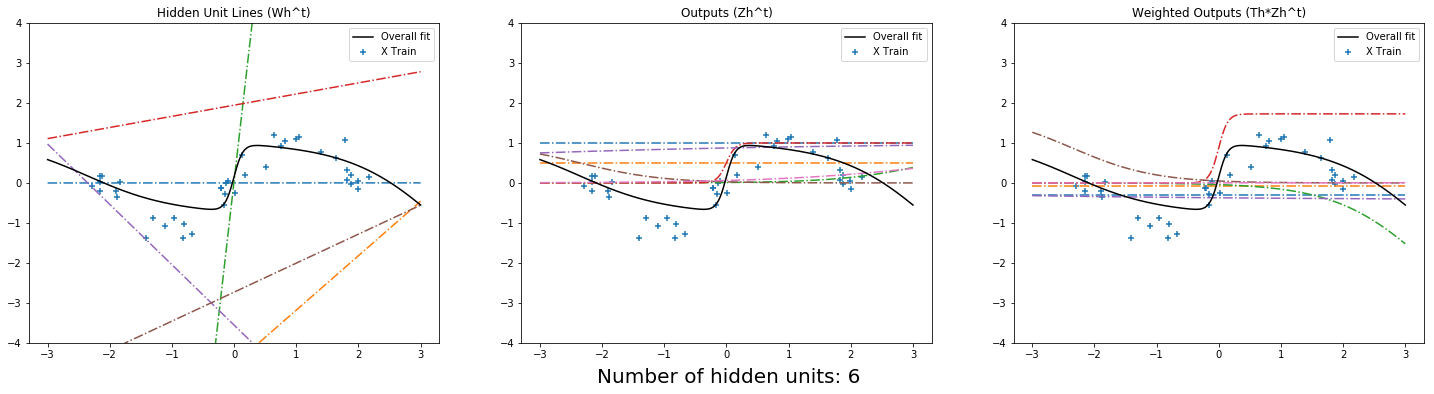

Test set loss: 2.1177


In [7]:
learning_rate=0.001
momentum_rate=0.01
h_nodes=6
weights_W=np.random.uniform(-0.001,0.001,(h_nodes,2)) #initialize W ,2(input+bias)-#hidden_layers
weights_T=np.random.uniform(-0.001,0.001,h_nodes+1)#initialize T 
print("Beginning...")
plot_props_of_hidden_layer(h_nodes,weights_T,weights_W)


epochs=250
for m in range(epochs):     
    shuffled_X,shuffled_Y=shuffle_dataset(X_train,y_train)
    grad_Th=np.zeros(h_nodes+1,dtype=np.float64)
    grad_Whj=np.zeros((h_nodes,2),dtype=np.float64)
    if (m==124):
        print("Middle...")
        plot_props_of_hidden_layer(h_nodes,weights_T,weights_W)
    for x,r in zip(shuffled_X,shuffled_Y):
        
        """storing previous gradients for momentum"""
        prev_grad_Th=np.copy(grad_Th)
        prev_grad_Whj=np.copy(grad_Whj)

        x=np.array([1,x])# +1 bias
        z=calculate_Z(x,h_nodes,weights_W)
        z=np.insert(z,0,1)# +1 bias
        y=calculate_Y(z,weights_T)

        """Backpropagation"""
        #1-Calculate gradients
        for h in range(len(grad_Th)):
            grad_Th[h]=learning_rate*(r-y)*z[h]

        for h in range(h_nodes):
            for j in range(len(x)):
                grad_Whj[h][j]=learning_rate*(r-y)*weights_T[h]*z[h]*(1-z[h])*x[j]

        #2-Update weights
        for h in range(len(grad_Th)):
            weights_T[h]+=(grad_Th[h]+(momentum_rate*prev_grad_Th[h]))
        for h in range(h_nodes):
            for j in range(len(x)):
                weights_W[h][j]+=(grad_Whj[h][j]+(momentum_rate*prev_grad_Whj[h][j]))

    train_loss=loss_func(predict(shuffled_X,h_nodes,weights_T,weights_W),shuffled_Y)
    val_loss=loss_func(predict(X_val,h_nodes,weights_T,weights_W),y_val)
    print("Epoch: "+str(m+1)+" Training Error: %.4f"%train_loss +" Validation Error: %.4f"%val_loss)

    learning_rate+=0.001
print("End")
plot_props_of_hidden_layer(h_nodes,weights_T,weights_W)
print("Test set loss: %.4f"%loss_func(predict(X_test,h_nodes,weights_T,weights_W),y_test))